# Data Science in 2019

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',None) # show all columns
pd.set_option('display.max_colwidth',None)# show all content in columns

### Load 2019 kaggle survey data

In [2]:
df = pd.read_csv('./kaggle-survey-2019/multiple_choice_responses.csv') #load dataset csv as dataframe
schema = pd.read_csv('./kaggle-survey-2019/survey_schema.csv') #load the schema of the dataset csv - used to understand data
df.head() #show first 5 tuples in the survey dataset

/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of you

### Use the schema to understand the data in the survey

For example, use the below line to understand when the question in **Q4** was asked to the respondendts as not all questions are shown to the respondents.
From the result it can be observed that **Q4** was asked only if the respondent answered that they were 18 or older in a previous question. 

In [3]:
schema[['2019 Kaggle Machine Learning and Data Science Survey', 'Q4']]

,2019 Kaggle Machine Learning and Data Science Survey,Q4
0,Question:,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
1,# of Respondents:,19323
2,Who was excluded? (0 = not excluded; 1 = excluded),0
3,If What is your age (# years)? 0-17 Is Selected,1
4,If Select the title most similar to your current role (or most recent title if retired): Student Is Selected OR Select the title most similar to your current role (or most recent title if retired): Not employed Is Selected\n,0
5,If How long have you been writing code to analyze data (at work or at school)? I have never written code Is Selected,0
6,If Approximately how much money have you spent on machine learning and/or cloud computing products a... $0 (USD) Is Selected,0
7,If Which of the following ML algorithms do you use on a regular basis? (Select all that apply): Convolutional Neural Networks Is Not Selected Or Which of the following ML algorithms do you use on a regular basis? (Select all that apply): Generative Adversarial Networks Is Not Selected,0
8,"If Which of the following ML algorithms do you use on a regular basis? (Select all that apply): Recurrent Neural Networks Is Not Selected Or Which of the following ML algorithms do you use on a regular basis? (Select all that apply): Transformer Networks (BERT, gpt-2, etc) Is Not Selected",0
9,If Does your current employer incorporate machine learning methods into their business? No (we do not use ML methods) Is Selected Or Does your current employer incorporate machine learning methods into their business? I do not know Is Selected,0


### Load 2018 kaggle survey data

In [3]:
df2018 = pd.read_csv('./kaggle-survey-2018/multipleChoiceResponses.csv') #load dataset csv as dataframe
schema2018 = pd.read_csv('./kaggle-survey-2018/SurveySchema.csv') #load the schema of the dataset csv - used to understand data
df2018.head() #show first 5 tuples in the survey dataset

/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_P

In [47]:
schema2018[['2018 Kaggle Machine Learning and Data Science Survey', 'Q24']]

,2018 Kaggle Machine Learning and Data Science Survey,Q24
0,Question:,How long have you been writing code to analyze data?
1,# of Respondents:,18534
2,Who was excluded? (0 = not excluded; 1 = excluded),0
3,If What is your age (# years)? 0-17 Is Selected Edit Condition,1
4,If What is the highest level of formal education that you have attained or plan to attain within the... No formal education past high school Is Selected Edit Condition,0
5,If Select the title most similar to your current role (or most recent title if retired): Not employed Is Selected Edit Condition,0
6,Or How long have you been writing code to analyze data? I have never written code and I do not want to learn Is Selected Edit Condition,0
7,If How do you perceive the importance of the following topics? Fairness and bias in ML algorithms: - No opinion; I do not know Is SelectedEdit Condition,0
8,If How do you perceive the importance of the following topics? Being able to explain ML model outputs and/or predictions - No opinion; I do not know Is Selected Edit Condition,0
9,If How do you perceive the importance of the following topics? Reproducibility in data science - No opinion; I do not know Is SelectedEdit Condition,0


# Exploratory queries

## 1. Count responses by gender

### 1.1. 2019 survey data

In [4]:
gender_missing_vals = df.Q2.isnull().sum()

gender_vals = df.groupby('Q2').size().reset_index()
gender_vals.rename(columns={'Q2':'Gender', 0:'Count'},inplace = True)
gender_vals.drop([4],inplace = True)
gender_vals

,Gender,Count
0,Female,3212
1,Male,16138
2,Prefer not to say,318
3,Prefer to self-describe,49


### 1.2. 2018 survey data

In [5]:
gender_missing_vals2018 = df2018.Q1.isnull().sum()

gender_vals2018 = df2018.groupby('Q1').size().reset_index()
gender_vals2018.rename(columns={'Q1':'Gender', 0:'Count'},inplace = True)
gender_vals2018.drop([4],inplace = True)
gender_vals2018

,Gender,Count
0,Female,4010
1,Male,19430
2,Prefer not to say,340
3,Prefer to self-describe,79


## 2. Plot gender ratios

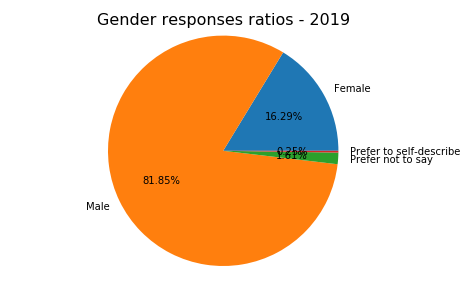

In [25]:
fig = plt.figure()
fig.suptitle('Gender responses ratios - 2019', fontsize=16)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender_names = gender_vals['Gender'] 
gender_counts = gender_vals['Count']
ax.pie(gender_counts, labels = gender_names,autopct='%1.2f%%')
plt.show()


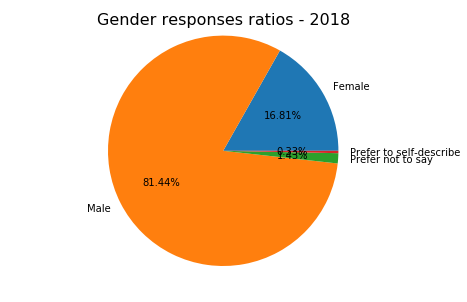

In [22]:
fig2018 = plt.figure()
fig2018.suptitle('Gender responses ratios - 2018', fontsize=16)
ax2018 = fig2018.add_axes([0,0,1,1])
ax2018.axis('equal')
gender_names2018 = gender_vals2018['Gender'] 
gender_counts2018 = gender_vals2018['Count']
ax2018.pie(gender_counts2018, labels = gender_names2018,autopct='%1.2f%%')
plt.show()

# 1. Start of the career or career shift?

## 1.1. 2019 Survey data

### 1.1.1 Tackling missing values in _Q15_ - years of coding for data science 

In [36]:
years_coding_missing_vals = df.Q15.isnull().sum()
# years_coding_missing_vals # = 4090

# Select info about years coding, age, and professional role
years_coding_age_role = df[['Q15','Q1','Q5']]
years_coding_age_role

# Count responses grouped by age
years_coding_age_role_gbAge = years_coding_age_role.groupby(['Q1']).count().reset_index()
# years_coding_age_role_gbAge

In [37]:
# Count responses grouped by years coding for data science and compute their modes
years_coding_age_role_modes = years_coding_age_role.groupby('Q1').Q15.apply(lambda x: x.mode()).reset_index()
# years_coding_age_role_modes

In [38]:
# Fill any missing values in "Q15 - Years of coding" with the mode value per age group on "Years of coding"
years_coding_age_role_filled = years_coding_age_role.copy()
years_coding_age_role_filled['Q15'] = years_coding_age_role[['Q1', 'Q15']].groupby('Q1').transform(lambda x: x.fillna(x.mode().iloc[0]))['Q15']
# years_coding_age_role_filled
# years_coding_age_role_filled.shape[0]

### 1.1.2 Group by age and years of coding - compute ratios relative to the whole dataset

In [39]:
years_coding_age_role_filled_gbAge = years_coding_age_role_filled.groupby(['Q1','Q15']).count().reset_index()
years_coding_age_role_filled_gbAge['Q5'] = (years_coding_age_role_filled_gbAge['Q5']/years_coding_age_role_filled.shape[0])*100
years_coding_age_role_filled_gbAge = years_coding_age_role_filled_gbAge.drop(77)
# years_coding_age_role_filled_gbAge
# years_coding_age_role_filled[years_coding_age_role.Q1=='18-21'][years_coding_age_role.Q15=='20+ years']

In [43]:
# years_coding_age_role_filled.Q15.value_counts()
# years_coding_age_role_filled.Q1.value_counts()

### 1.1.3 Plot results

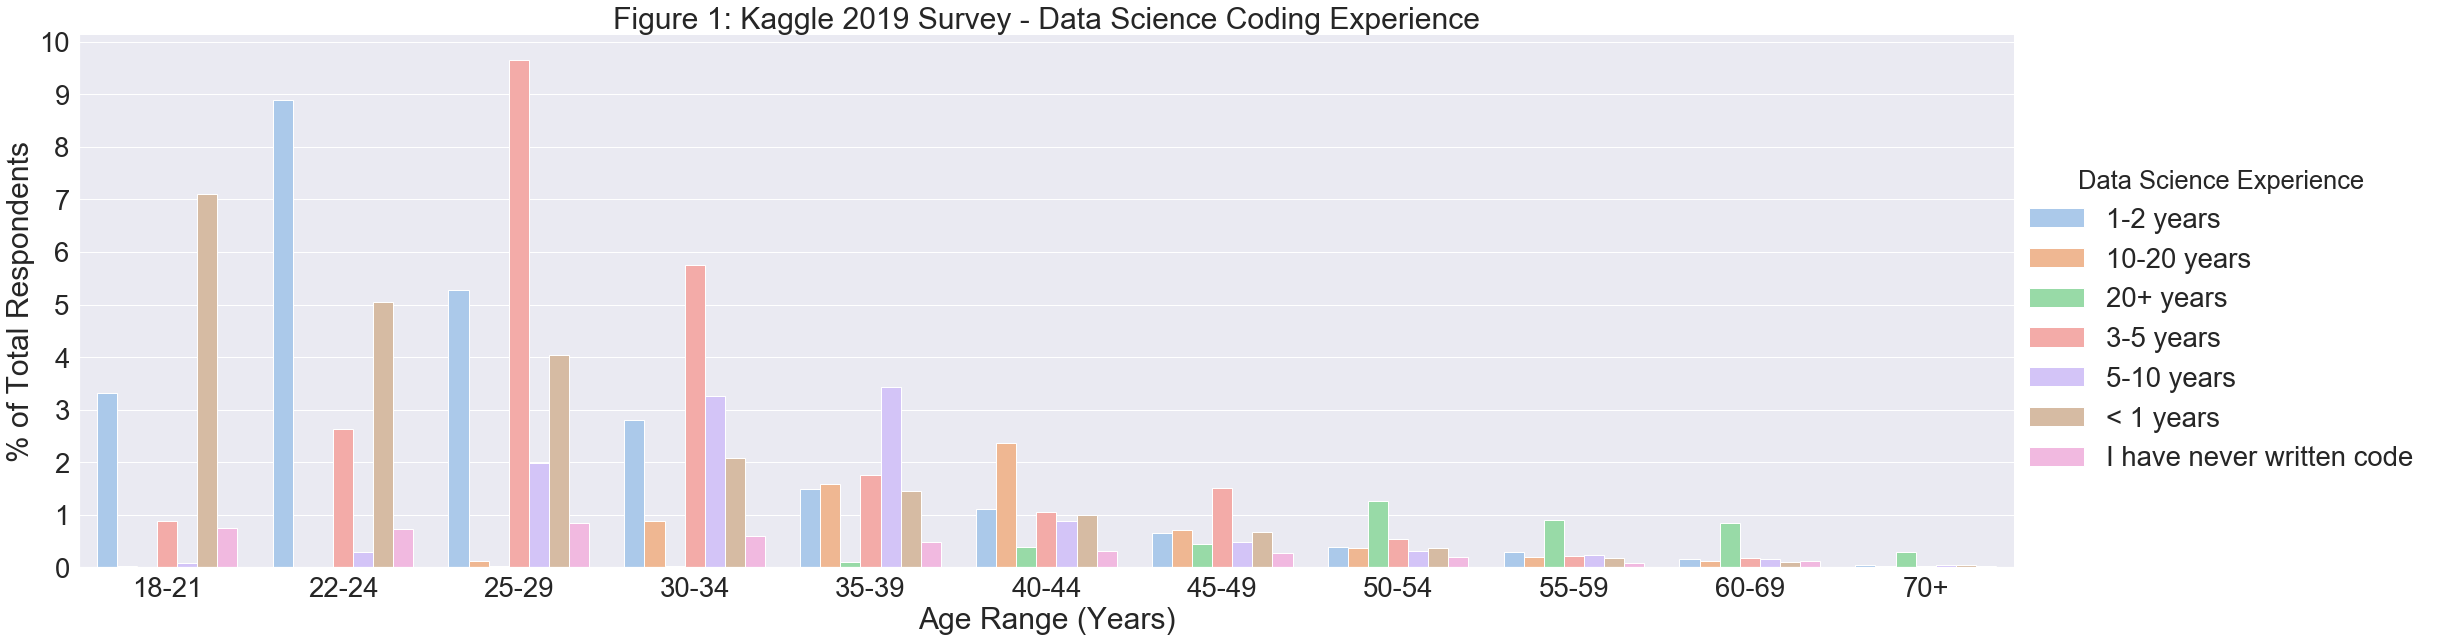

In [40]:
# Plot results

sns.set(font_scale=2.5) 
years_coding_age_role_filled_gbAge.rename(columns={'Q1':'Age Range (Years)', 'Q5':'% of Total Respondents', 'Q15': 'Data Science Experience'},inplace = True)
facet = sns.catplot(x="Age Range (Years)", y="% of Total Respondents", hue="Data Science Experience", kind="bar", palette = "pastel", data=years_coding_age_role_filled_gbAge, height=9.27, aspect=22.7/7.27)

facet.ax.set_title("Figure 1: Kaggle 2019 Survey - Data Science Coding Experience")
facet.ax.set_yticks(np.arange(0, 11,1.0))

plt.show()

### 1.1.4 Analyze results

Analyzing the results, one would say that most responses fall withing the expected categories, however, there are a few surprises as well:
    
 <ul>
<li>Being 18-29 years old is often considered as being at the beginning of ones career, thus, almost all respondents fall into the categories "3-5 years" of coding experience or less ("1-2 years" or "< 1 years"). This is expected as most are graduates that just started learning or working within the area or Data Science. </li>
<li>Being 30-49 years old is often considered as being senior in a field, thus, one would expect that most respondents fall into the categories with 5 or more years of experience. However, if we look at all the age batches within 30-49 years, one can see that most respondents may fall within the expected categories, however, more than half of the repsondents per age range are with 5 or less years of experience, which would suggest a career shift. Moreover, looking at the range 45-49 years, we can see that most respodents are with 3-5 years of coding experience, suggesting a career shift towards Data Science as at this age one would expect 10+ years of experience on a narural career evolution.</li>
<li>Being 50+ years old is often considered as being at a very mature point in ones career, thus, almost all respondents fall into the category  "20+ years" of coding experience. Nevertheless, even in these age ranges one can see that the next  most often answer is "1-2 years" meaning that there are people that considered starting a career in Data Science even after more than 20 years of experience in another field. That's quite a motivation! </li>
</ul>

## 1.2. 2018 Survey data

### 1.2.1 Tackling missing values in _Q24_ - years of coding for data science 

In [51]:
years_coding_missing_vals = df2018.Q24.isnull().sum()
years_coding_missing_vals # = 5326 missing values

# Select info about years coding, age, and professional role
years_coding_age_role = df2018[['Q24','Q2','Q6']].copy()


In [56]:
# Bring to the same response format as for 2019 survey
years_coding_age_role.loc[years_coding_age_role.Q24 == 'I have never written code but I want to learn','Q24'] = 'I have never written code'
years_coding_age_role.loc[years_coding_age_role.Q24 == 'I have never written code and I do not want to learn','Q24'] = 'I have never written code'

years_coding_age_role.loc[years_coding_age_role.Q2 == '80+','Q2'] = '70+'
years_coding_age_role.loc[years_coding_age_role.Q2 == '70-79','Q2'] = '70+'

years_coding_age_role.loc[years_coding_age_role.Q24 == '20-30 years','Q24'] = '20+ years'
years_coding_age_role.loc[years_coding_age_role.Q24 == '30-40 years','Q24'] = '20+ years'
years_coding_age_role.loc[years_coding_age_role.Q24 == '40+ years','Q24'] = '20+ years'

years_coding_age_role

,Q24,Q2,Q6
0,How long have you been writing code to analyze data?,What is your age (# years)?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice
1,I have never written code,45-49,Consultant
2,I have never written code,30-34,Other
3,5-10 years,30-34,Data Scientist
4,5-10 years,35-39,Not employed
...,...,...,...
23855,3-5 years,45-49,Chief Officer
23856,NaN,25-29,NaN
23857,NaN,22-24,Software Engineer
23858,NaN,25-29,NaN


In [57]:
# Count responses grouped by age
years_coding_age_role_gbAge = years_coding_age_role.groupby(['Q2']).count().reset_index()
years_coding_age_role_gbAge

,Q2,Q24,Q6
0,18-21,1918,2881
1,22-24,3732,4905
2,25-29,4888,5917
3,30-34,3117,3645
4,35-39,1874,2175
5,40-44,1151,1308
6,45-49,742,833
7,50-54,504,562
8,55-59,290,322
9,60-69,251,269


In [58]:
# Count responses grouped by years coding for data science and compute their modes
years_coding_age_role_modes = years_coding_age_role.groupby('Q2').Q24.apply(lambda x: x.mode()).reset_index()
years_coding_age_role_modes

,Q2,level_1,Q24
0,18-21,0,< 1 year
1,22-24,0,1-2 years
2,25-29,0,1-2 years
3,30-34,0,3-5 years
4,35-39,0,5-10 years
5,40-44,0,10-20 years
6,45-49,0,10-20 years
7,50-54,0,20+ years
8,55-59,0,20+ years
9,60-69,0,20+ years


In [59]:
# Fill any missing values in "Q15 - Years of coding" with the mode value per age group on "Years of coding"
years_coding_age_role_filled = years_coding_age_role.copy()
years_coding_age_role_filled['Q24'] = years_coding_age_role[['Q2', 'Q24']].groupby('Q2').transform(lambda x: x.fillna(x.mode().iloc[0]))['Q24']
years_coding_age_role_filled = years_coding_age_role_filled.drop(0)
years_coding_age_role_filled
# years_coding_age_role_filled.shape[0]

,Q24,Q2,Q6
1,I have never written code,45-49,Consultant
2,I have never written code,30-34,Other
3,5-10 years,30-34,Data Scientist
4,5-10 years,35-39,Not employed
5,5-10 years,22-24,Data Analyst
...,...,...,...
23855,3-5 years,45-49,Chief Officer
23856,1-2 years,25-29,NaN
23857,1-2 years,22-24,Software Engineer
23858,1-2 years,25-29,NaN


### 1.2.2 Group by age and years of coding - compute ratios relative to the whole dataset

In [60]:
years_coding_age_role_filled_gbAge = years_coding_age_role_filled.groupby(['Q2','Q24']).count().reset_index()
years_coding_age_role_filled_gbAge['Q6'] = (years_coding_age_role_filled_gbAge['Q6']/years_coding_age_role_filled.shape[0])*100

# years_coding_age_role_filled_gbAge = years_coding_age_role_filled_gbAge.drop(110)
years_coding_age_role_filled_gbAge
# years_coding_age_role_filled[years_coding_age_role.Q1=='18-21'][years_coding_age_role.Q15=='20+ years']

,Q2,Q24,Q6
0,18-21,1-2 years,2.749487
1,18-21,10-20 years,0.016765
2,18-21,20+ years,0.004191
3,18-21,3-5 years,0.733476
4,18-21,5-10 years,0.071252
...,...,...,...
71,70+,20+ years,0.217947
72,70+,3-5 years,0.012574
73,70+,5-10 years,0.012574
74,70+,< 1 year,0.004191


### 1.2.3 Plot results

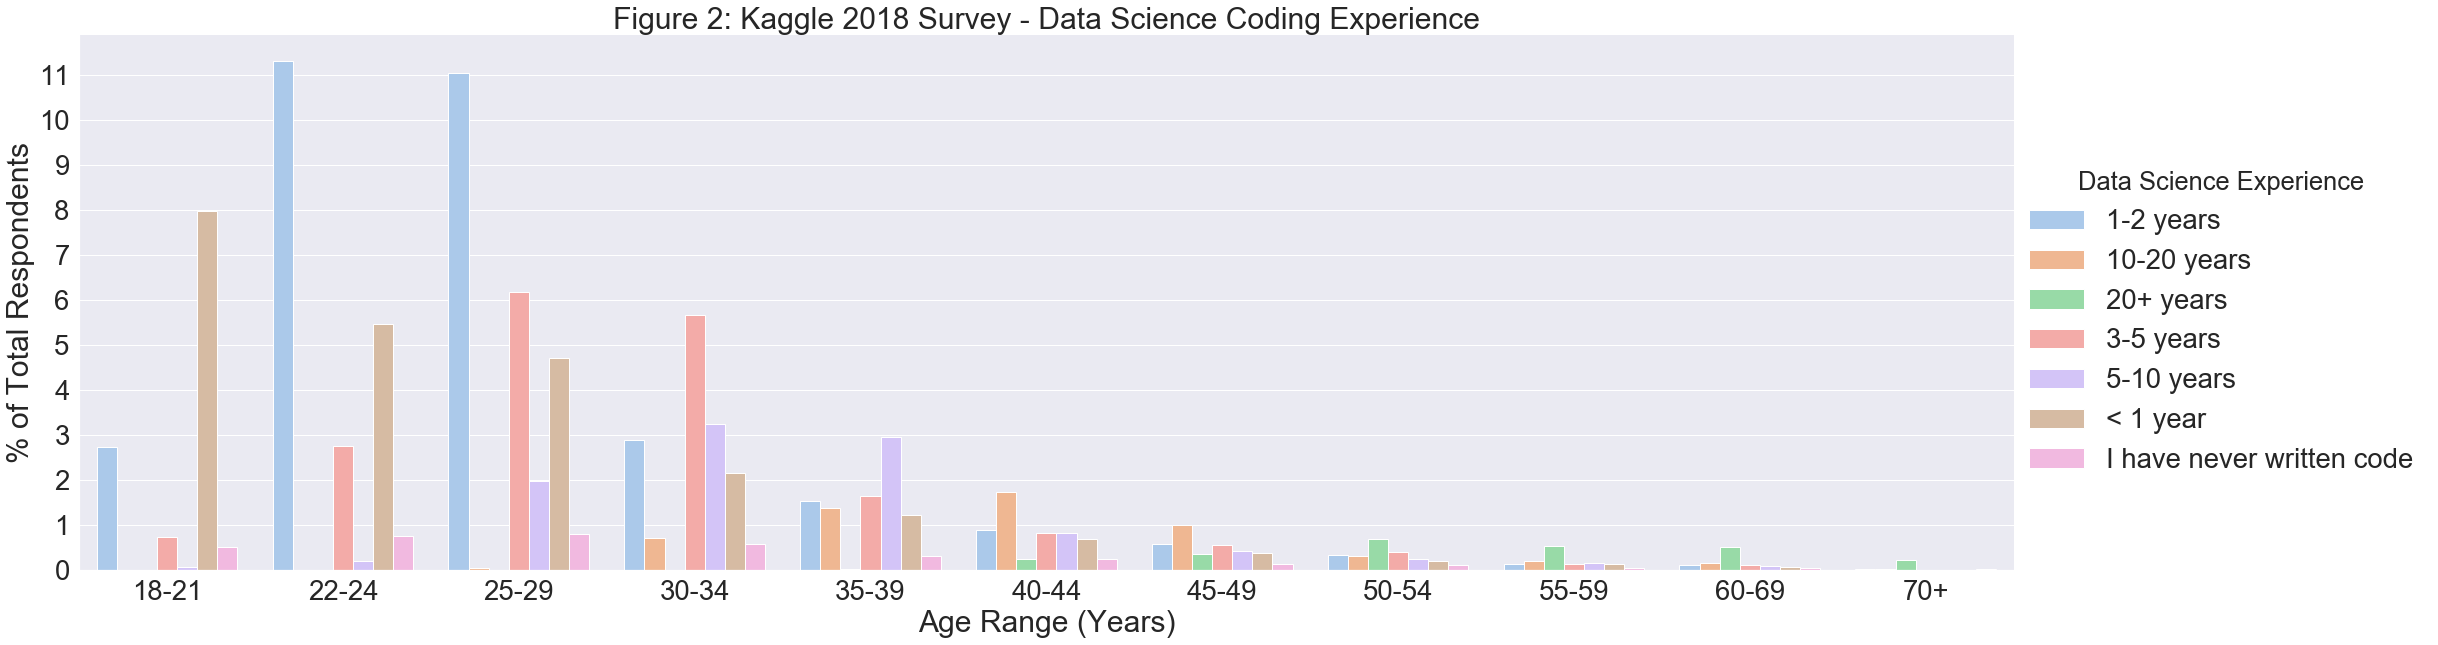

In [62]:
# Plot results
sns.set(font_scale=2.5) 
years_coding_age_role_filled_gbAge.rename(columns={'Q2':'Age Range (Years)', 'Q6':'% of Total Respondents', 'Q24': 'Data Science Experience'},inplace = True)
facet = sns.catplot(x="Age Range (Years)", y="% of Total Respondents", hue="Data Science Experience", kind="bar", palette = "pastel", data=years_coding_age_role_filled_gbAge, height=9.27, aspect=22.7/7.27)
facet.ax.set_yticks(np.arange(0, 11.5,1))
facet.ax.set_title("Figure 2: Kaggle 2018 Survey - Data Science Coding Experience")
plt.show()

### 1.2.4 Analyze results

Analyzing the results, one would say that most responses fall withing the expected categories, however, there are a few surprises as well:
    
 <ul>
<li>Being 18-29 years old is often considered as being at the beginning of ones career, thus, almost all respondents fall into the categories "3-5 years" of coding experience or less ("1-2 years" or "< 1 years"). This is expected as most are graduates that just started learning or working within the area of Data Science. </li>
<li>Being 30-54 years old is often considered as being senior in a field, thus, one would expect that most respondents fall into the categories with 5 or more years of experience. However, if we look at all the age batches within 30-49 years, one can see that most respondents may fall within the expected categories, however, more than half of the repsondents per age range are with 5 or less years of experience, which would suggest a career shift. Moreover, looking at the range 50-54 years, we can see that most respodents are with 3-5 years of coding experience, suggesting a career shift towards Data Science as at this age one would expect 10+ years of experience on a continuous career evolution in the same doamin.</li>
<li>Being 55+ years old is often considered as being at a very mature point in ones career, thus, almost all respondents fall into the categories  of 20+ years of coding experience. Nevertheless, even in these age ranges one can see that there are some answers with  5 or less years, meaning that there are people that considered starting a career in Data Science even after more than 20 years of experience in another field. That's quite a motivation! </li>
</ul>

## 1.3 Career shifts to Data Science 2018 vs. 2019

Considering the two plots in Sections 1.1.3 and 1.2.3, one can see that although the majority of the respondents fall into the expected categories in terms of years of conding for analyzing data, some have less experience in the domain although their age rage would suggest a more senior position is expected from a continous career evolution in the same domain. More precisely:
- in 2019, the age range that was the most surprising was 45-49 where most respondents had 3-5 years of coding experience, while it was expected a 10+ experience
- in 2018, 50-54 age rage had most respondents with 3-5 years of experience, while it was expected 10+ years as well. 

One could argue that the two age ranges are quite close, suggesting that people who reach mature points in their careers but are still facing a 10-20+ work years ahead of them are inclined to make a career shift to Data Science, while people who are early or later in their career do not tend to change. 

Well done to the brave shifters! It's never too late to make a change towards something you are passionate about!


# 2. Degree vs. online courses?

## 2.1 2019 Survey data

### 2.1.1 Getting the relevant information from the dataset 

In [63]:
#univ degree learning is in 'Q13_Part_10', NONE is in 'Q13_Part_11',
courses_df=df[['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_12']].copy() 
# courses_df


In [64]:
#count the number of online courses per row - we don't care about which courses were taken
courses_per_row = courses_df.shape[1] - courses_df.isnull().sum(axis=1)

# building the analyzed dataset
formalEd_compSize_gender_age_role_courses = df[['Q4','Q6','Q2','Q1','Q5','Q5_OTHER_TEXT','Q10']].copy()
formalEd_compSize_gender_age_role_courses['all_courses'] = courses_per_row.loc[:]
formalEd_compSize_gender_age_role_courses
# formalEd_courses_compSize_gender[formalEd_courses_compSize_gender.all_courses == 0]



,Q4,Q6,Q2,Q1,Q5,Q5_OTHER_TEXT,Q10,all_courses
0,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,What is the size of the company where you are employed?,What is your gender? - Selected Choice,What is your age (# years)?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is your current yearly compensation (approximate $USD)?,10
1,Master’s degree,"1000-9,999 employees",Male,22-24,Software Engineer,-1,"30,000-39,999",4
2,Professional degree,"> 10,000 employees",Male,40-44,Software Engineer,-1,"5,000-7,499",4
3,Professional degree,NaN,Female,55-59,NaN,-1,NaN,0
4,Master’s degree,"> 10,000 employees",Male,40-44,Other,0,"250,000-299,999",3
...,...,...,...,...,...,...,...,...
19713,NaN,NaN,Male,50-54,NaN,-1,NaN,0
19714,Bachelor’s degree,250-999 employees,Male,18-21,Other,-1,$0-999,2
19715,Master’s degree,NaN,Male,35-39,Student,-1,NaN,2
19716,Master’s degree,50-249 employees,Male,25-29,Statistician,-1,"1,000-1,999",0


### 2.1.2 Tackling missing information in **Q5** - professional role information

In [65]:
# Fill NaN answers to Q5 with whatever is in Q5_OTHER_TEXT if anything, IF other == -1, then fill with Other
formalEd_compSize_gender_age_role_courses['Q5'] = formalEd_compSize_gender_age_role_courses[['Q5', 'Q5_OTHER_TEXT']].transform(lambda x: x.fillna(formalEd_compSize_gender_age_role_courses.Q5_OTHER_TEXT[~formalEd_compSize_gender_age_role_courses.Q5_OTHER_TEXT.isnull()]))['Q5'] 
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q5 == -1 ,'Q5'] = 'Other'
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q5 == '-1' ,'Q5'] = 'Other'
formalEd_compSize_gender_age_role_courses.Q5.value_counts().reset_index()

,index,Q5
0,Data Scientist,4085
1,Student,4014
2,Software Engineer,2705
3,Other,2300
4,Data Analyst,1598
5,Research Scientist,1470
6,Not employed,942
7,Business Analyst,778
8,Product/Project Manager,723
9,Data Engineer,624


### 2.1.3 Tackling missing information in **Q6** - size of the company information

In [66]:
# Fill NaN answers to Q6 with 1) 'Student' if contained in Q5 or 2) 'Not employed' if contained in Q5 or 3) 'Under age' if Age == '0-17'
# Student
formalEd_compSize_gender_age_role_courses['Q6'] = formalEd_compSize_gender_age_role_courses[['Q6', 'Q5']].transform(lambda x: x.fillna(formalEd_compSize_gender_age_role_courses.Q5[formalEd_compSize_gender_age_role_courses.Q5=='Student']))['Q6'] 

# Not employed
formalEd_compSize_gender_age_role_courses['Q6'] = formalEd_compSize_gender_age_role_courses[['Q6', 'Q5']].transform(lambda x: x.fillna(formalEd_compSize_gender_age_role_courses.Q5[formalEd_compSize_gender_age_role_courses.Q5=='Not employed']))['Q6'] 

# Under age (but there are none in this dataset)
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q1 == '0-17' ,'Q6'] = 'Under age'

# Treat NaN in company size column - Q6 
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q6.isnull() ,'Q6'] = 'No answer'
formalEd_compSize_gender_age_role_courses.Q6.value_counts()

# show new dataset
# formalEd_compSize_gender_age_role_courses #.Q1.value_counts()

0-49 employees                                             4025
Student                                                    4014
> 10,000 employees                                         3160
1000-9,999 employees                                       2641
50-249 employees                                           2329
250-999 employees                                          1847
Not employed                                                942
No answer                                                   759
What is the size of the company where you are employed?       1
Name: Q6, dtype: int64

### 2.1.4 Tackling missing information in **Q4** - degree information

In [67]:
# Treat NaN in degree column - Q4
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q4.isnull() ,'Q4'] = 'I prefer not to answer'
# formalEd_compSize_gender_age_role_courses.Q4.value_counts()

In [68]:
# Format strings that are too long in Q4 
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q4 == 'Some college/university study without earning a bachelor’s degree' ,'Q4'] = 'Studies without bachelor degree'
formalEd_compSize_gender_age_role_courses.loc[formalEd_compSize_gender_age_role_courses.Q4 == 'No formal education past high school' ,'Q4'] = 'High school'
# formalEd_compSize_gender_age_role_courses.Q4.value_counts()

### 2.1.5 Protting results for __degree vs. online courses__

In [69]:
formalEd_compSize_gender_age_role_courses = formalEd_compSize_gender_age_role_courses.drop(0)
# formalEd_compSize_gender_age_role_courses

In [70]:
# Put in column Q6 the percent of people with courses (per number of courses) relative to the total number of people with a certain degree
formalEd_compSize_gender_age_role_courses_gbDegreeCourses = formalEd_compSize_gender_age_role_courses.groupby(['Q4','all_courses']).count().reset_index()
formalEd_compSize_gender_age_role_courses_gbDegreeCourses['Q6'] = formalEd_compSize_gender_age_role_courses_gbDegreeCourses[['Q4', 'Q6']].groupby('Q4').transform(lambda x: x*100/x.sum())['Q6']
formalEd_compSize_gender_age_role_courses_gbDegreeCourses.groupby('Q4').sum()
formalEd_compSize_gender_age_role_courses_gbDegreeCourses

,Q4,all_courses,Q6,Q2,Q1,Q5,Q5_OTHER_TEXT,Q10
0,Bachelor’s degree,0,24.528617,1470,1470,1470,1470,510
1,Bachelor’s degree,1,25.563157,1532,1532,1532,1532,867
2,Bachelor’s degree,2,21.341565,1279,1279,1279,1279,786
3,Bachelor’s degree,3,14.066411,843,843,843,843,575
4,Bachelor’s degree,4,7.942600,476,476,476,476,326
...,...,...,...,...,...,...,...,...
63,Studies without bachelor degree,5,2.628435,22,22,22,22,12
64,Studies without bachelor degree,6,1.911589,16,16,16,16,13
65,Studies without bachelor degree,7,0.597372,5,5,5,5,4
66,Studies without bachelor degree,8,0.477897,4,4,4,4,2


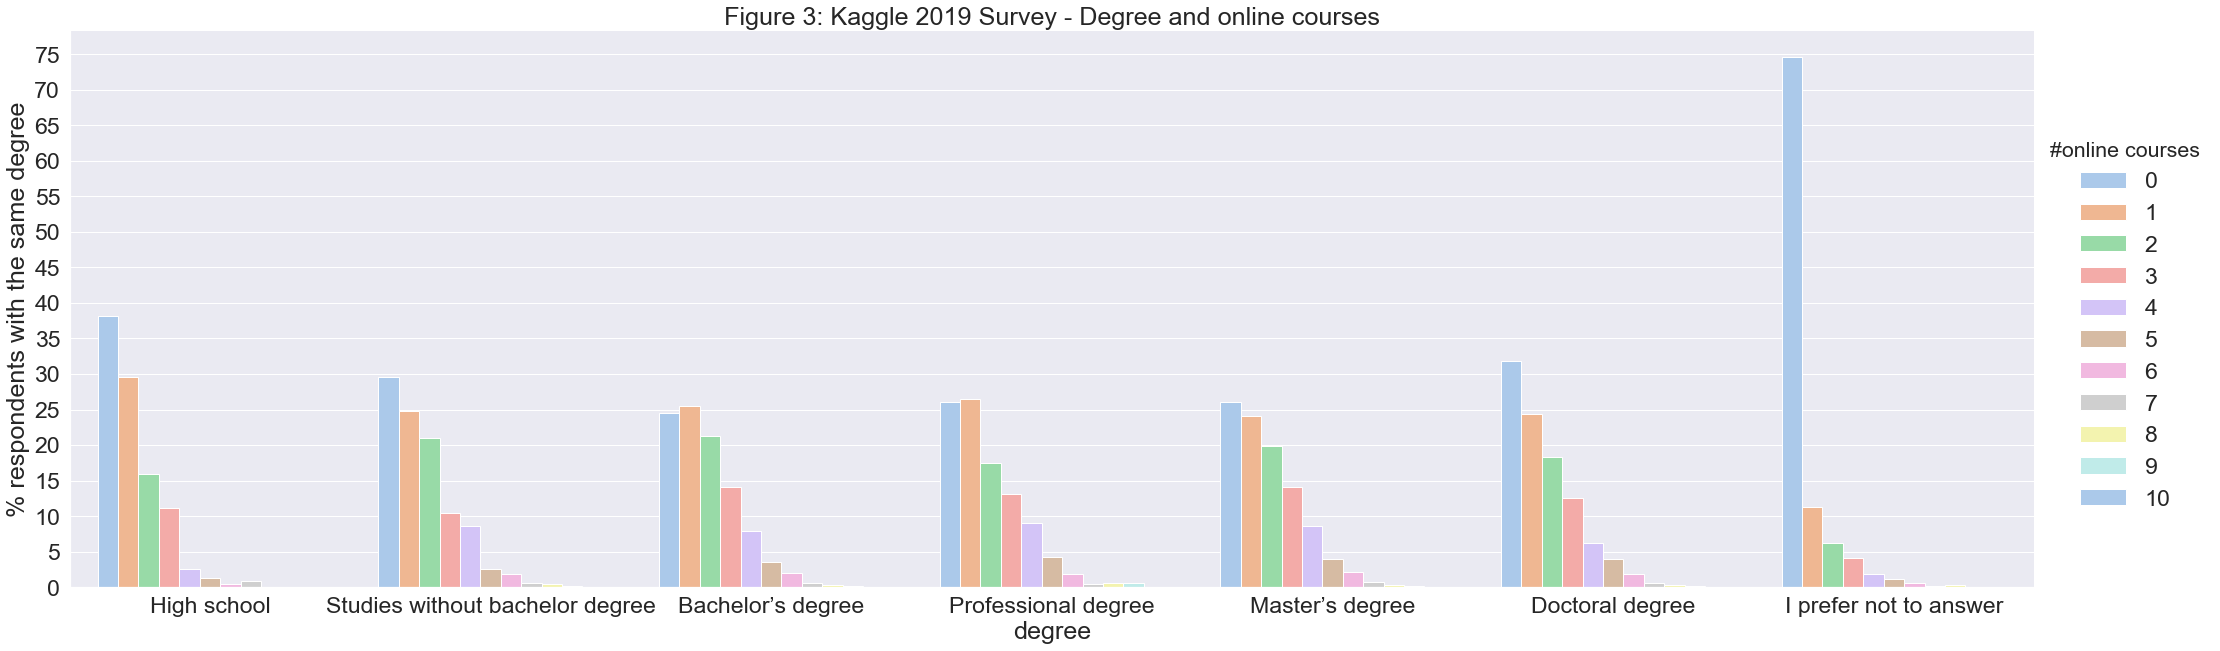

In [78]:
# Plot results
sns.set(font_scale=2.1) 
bin_order = ["High school", "Studies without bachelor degree",  "Bachelor’s degree", "Professional degree", "Master’s degree", "Doctoral degree", "I prefer not to answer"]
formalEd_compSize_gender_age_role_courses_gbDegreeCourses.rename(columns={'Q4':'degree','Q6':'% respondents with the same degree' , 'Q1':'Age', 'all_courses': '#online courses'},inplace = True)
facet = sns.catplot(x="degree", y="% respondents with the same degree", hue="#online courses", data=formalEd_compSize_gender_age_role_courses_gbDegreeCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
            palette="pastel", order = bin_order)
facet.ax.set_yticks(np.arange(0, 76,5))
facet.ax.set_title("Figure 3: Kaggle 2019 Survey - Degree and online courses")
plt.show()

## 2.2 2018 Survey data

## 2.2.1 Getting the relevant information

In [79]:
#univ degree learning is in 'Q36_Part_11', NONE is in 'Q36_Part_12',
courses_df_2018=df2018[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_13' ]].copy() 
# courses_df_2018

In [80]:
#count the number of online courses per row - we don't care about which courses were taken
courses_per_row2018 = courses_df_2018.shape[1] - courses_df_2018.isnull().sum(axis=1)

# building the analyzed dataset
formalEd_gender_age_role_courses = df2018[['Q4','Q6','Q2','Q1','Q9']].copy()
formalEd_gender_age_role_courses['all_courses'] = courses_per_row2018.loc[:]
# formalEd_gender_age_role_courses
# formalEd_courses_compSize_gender[formalEd_courses_compSize_gender.all_courses == 0]

## 2.2.2 Tackling missing information in **Q4** - degree information

In [81]:
# Treat NaN in degree column - Q4
formalEd_gender_age_role_courses.loc[formalEd_gender_age_role_courses.Q4.isnull() ,'Q4'] = 'I prefer not to answer'

# Format strings that are too long in Q4 
formalEd_gender_age_role_courses.loc[formalEd_gender_age_role_courses.Q4 == 'Some college/university study without earning a bachelor’s degree' ,'Q4'] = 'Studies without bachelor degree'
formalEd_gender_age_role_courses.loc[formalEd_gender_age_role_courses.Q4 == 'No formal education past high school' ,'Q4'] = 'High school'

formalEd_gender_age_role_courses = formalEd_gender_age_role_courses.drop(0)
# formalEd_compSize_gender_age_role_courses

formalEd_gender_age_role_courses.Q4.value_counts()

Master’s degree                    10855
Bachelor’s degree                   7083
Doctoral degree                     3357
Studies without bachelor degree      967
I prefer not to answer               766
Professional degree                  599
High school                          232
Name: Q4, dtype: int64

## 2.2.3 Plotting the results

In [82]:
# Put in column Q6 the percent of people with courses (per number of courses) relative to the total number of people with a certain degree
formalEd_gender_age_role_courses_gbDegreeCourses = formalEd_gender_age_role_courses.groupby(['Q4','all_courses']).count().reset_index()
formalEd_gender_age_role_courses_gbDegreeCourses['Q2'] = formalEd_gender_age_role_courses_gbDegreeCourses[['Q4', 'Q2']].groupby('Q4').transform(lambda x: x*100/x.sum())['Q2']
formalEd_gender_age_role_courses_gbDegreeCourses

,Q4,all_courses,Q6,Q2,Q1,Q9
0,Bachelor’s degree,0,3083,45.545673,3226,2452
1,Bachelor’s degree,1,1170,16.518424,1170,1045
2,Bachelor’s degree,2,1017,14.358323,1017,936
3,Bachelor’s degree,3,749,10.574615,749,669
4,Bachelor’s degree,4,440,6.212057,440,383
...,...,...,...,...,...,...
66,Studies without bachelor degree,6,12,1.240951,12,11
67,Studies without bachelor degree,7,5,0.517063,5,5
68,Studies without bachelor degree,8,2,0.206825,2,1
69,Studies without bachelor degree,9,2,0.206825,2,2


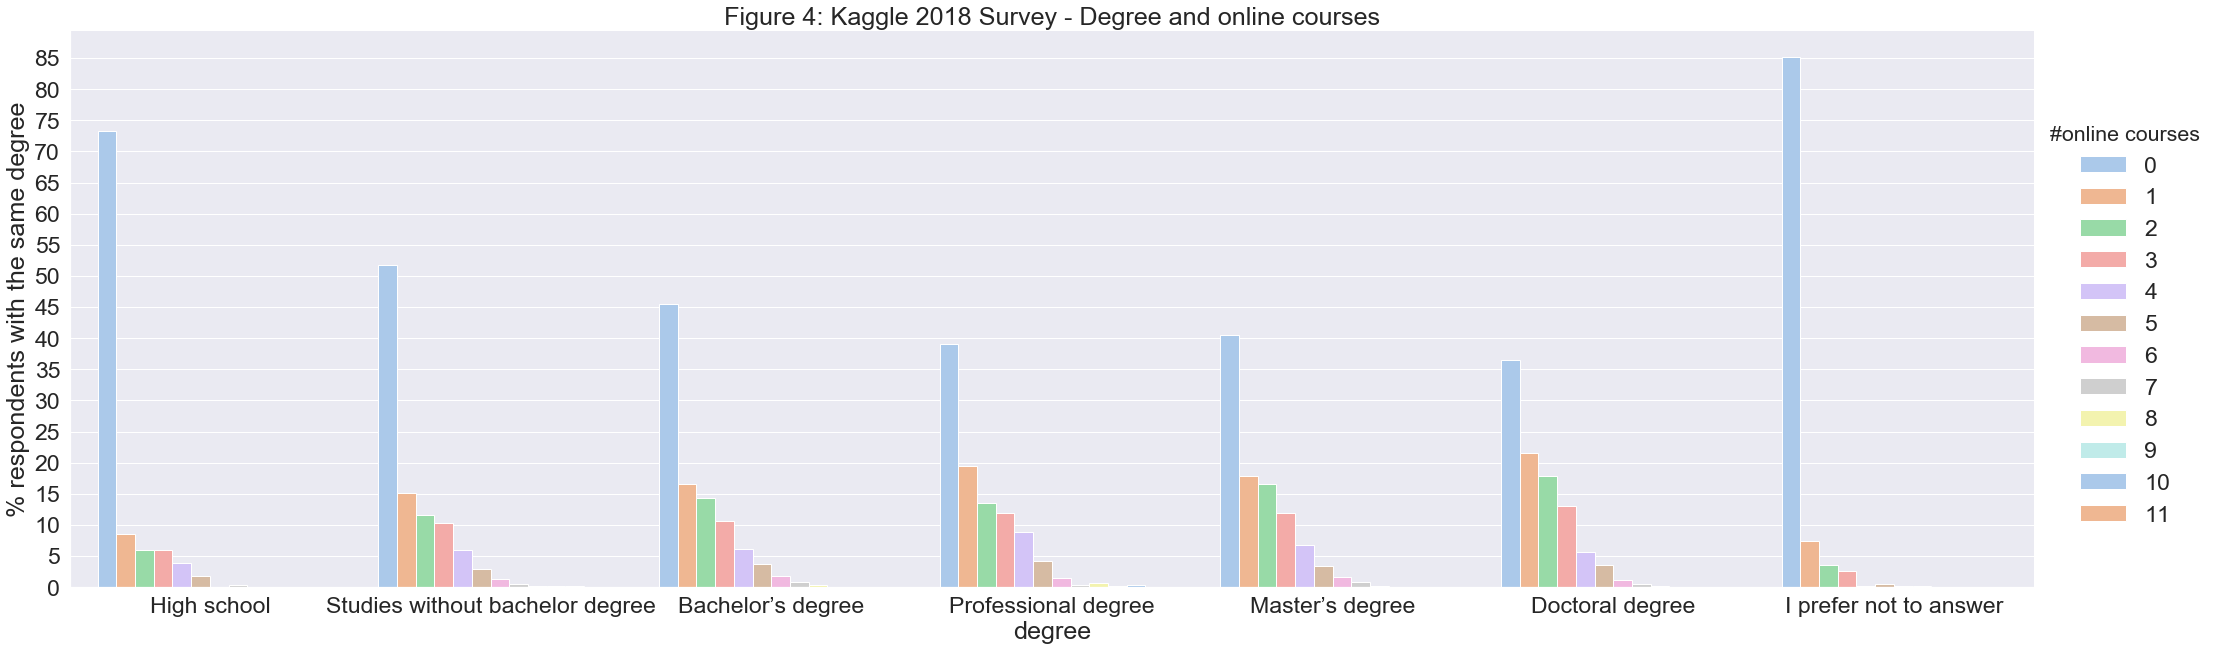

In [86]:
# Plot results
sns.set(font_scale=2.1) 
bin_order = ["High school", "Studies without bachelor degree", "Bachelor’s degree", "Professional degree", "Master’s degree", "Doctoral degree", "I prefer not to answer"]
formalEd_gender_age_role_courses_gbDegreeCourses.rename(columns={'Q4':'degree','Q2':'% respondents with the same degree' , 'all_courses': '#online courses'},inplace = True)
facet = sns.catplot(x="degree", y="% respondents with the same degree", hue="#online courses", data=formalEd_gender_age_role_courses_gbDegreeCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
            palette="pastel", order = bin_order)
facet.ax.set_yticks(np.arange(0, 90,5))
facet.ax.set_title("Figure 4: Kaggle 2018 Survey - Degree and online courses")
plt.show()

## 2.3 Analyzing the results - 2018 vs. 2019 - degree vs. online courses

Analyzing the two plots corresponding to 2018 and 2019 respectively, one can notice that the trend in the respondents' answers in 2018 is different from the one in 2019 as the percentage of respondents in 2019 who have taken at least one online course seems to have increased. 

Also, in 2019, the percentage of respondents with a Bachelor's or a Professional degree that have taken 1 course have exceeded that of those that haven't taken online courses, while in 2018 the percentage of respondents with the same degrees and no online course were with approximately 50% more than those with one course (which was the second most frequent answer after "no courses taken"). Furthermore, it can be said that although for all other dregrees the ratios of respondents with no online courses still exceed the other percentages, the gap between the "no courses" percent and the next most frequent answer (usually 1 online course) is much smaller in 2019 than in 2018 meaning that more people have taken taking online courses in 2019 than in 2018 (at least from the pool of survey respondents).

# 3. Do companies care about employees having attended/finished online courses?

## 3.1 2019 Survey data

In [87]:
formalEd_compSize_gender_age_role_courses_gbCompSizeCourses = formalEd_compSize_gender_age_role_courses.groupby(['Q6','all_courses']).count().reset_index()
formalEd_compSize_gender_age_role_courses_gbCompSizeCourses['Q4'] = formalEd_compSize_gender_age_role_courses_gbCompSizeCourses[['Q6', 'Q4']].groupby('Q6').transform(lambda x: x*100/x.sum())['Q4']
# formalEd_compSize_gender_age_role_courses_gbDegreeCourses.groupby('Q4').sum()
formalEd_compSize_gender_age_role_courses_gbCompSizeCourses = formalEd_compSize_gender_age_role_courses_gbCompSizeCourses.drop(formalEd_compSize_gender_age_role_courses_gbCompSizeCourses[formalEd_compSize_gender_age_role_courses_gbCompSizeCourses.Q6 == 'No answer'].index)
formalEd_compSize_gender_age_role_courses_gbCompSizeCourses

,Q6,all_courses,Q4,Q2,Q1,Q5,Q5_OTHER_TEXT,Q10
0,0-49 employees,0,28.372671,1142,1142,1142,1142,647
1,0-49 employees,1,24.198758,974,974,974,974,974
2,0-49 employees,2,19.428571,782,782,782,782,782
3,0-49 employees,3,12.670807,510,510,510,510,510
4,0-49 employees,4,8.496894,342,342,342,342,342
...,...,...,...,...,...,...,...,...
67,Student,5,2.665670,107,107,107,107,0
68,Student,6,1.743896,70,70,70,70,0
69,Student,7,0.622820,25,25,25,25,0
70,Student,8,0.124564,5,5,5,5,0


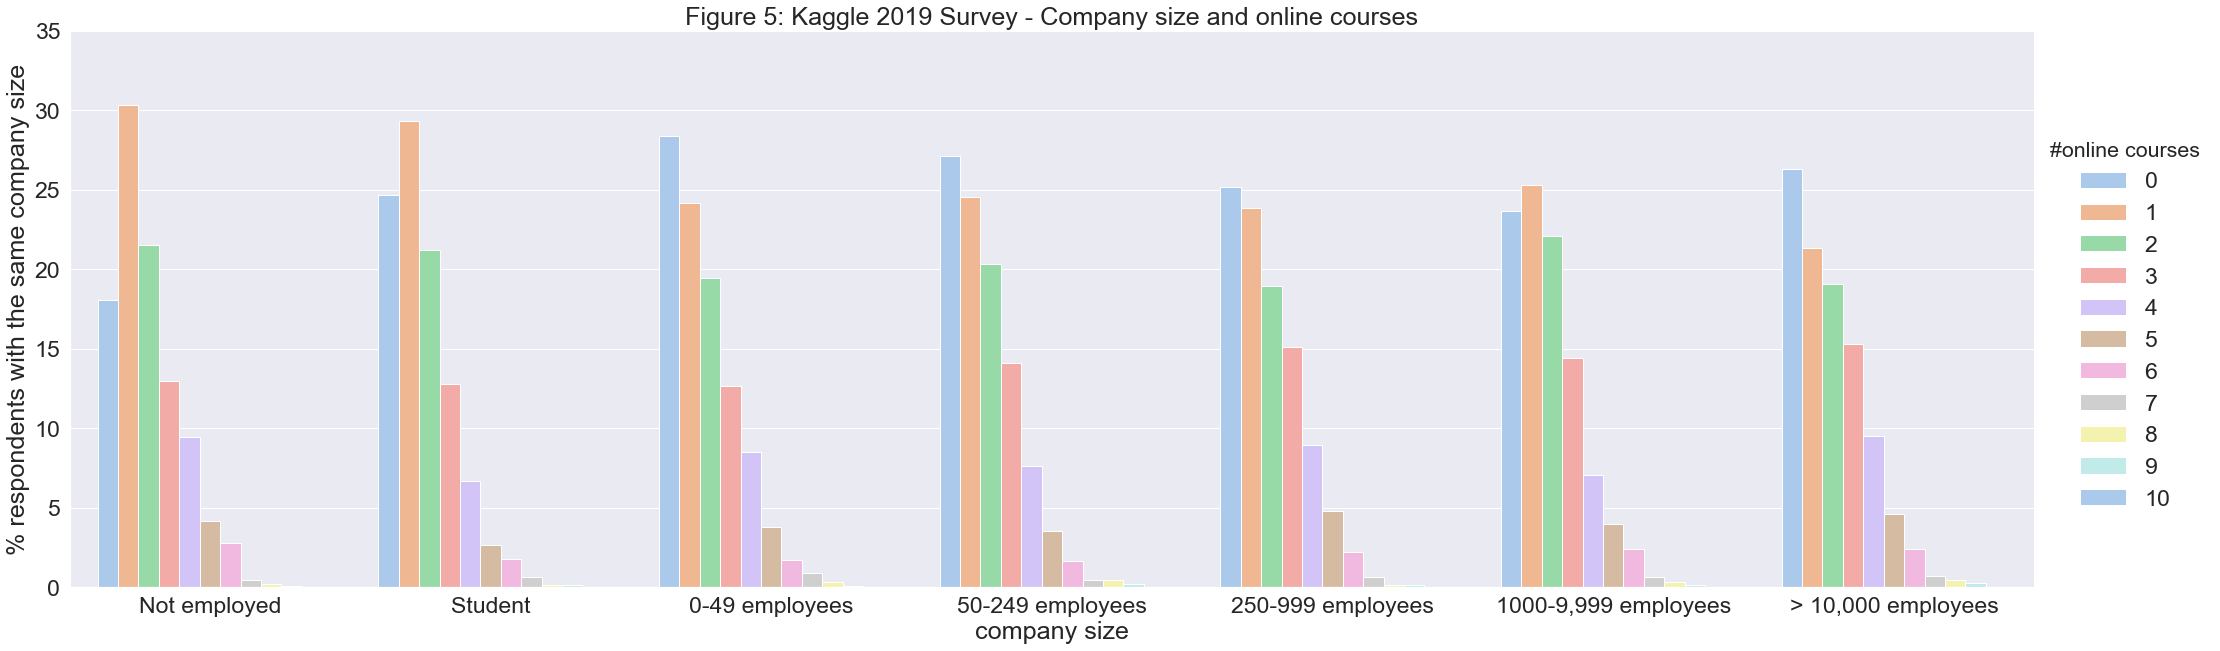

In [91]:
# Plot results
sns.set(font_scale=2.1) 
order_sizebin = ["Not employed", "Student", "0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "> 10,000 employees"]
formalEd_compSize_gender_age_role_courses_gbCompSizeCourses.rename(columns={'Q4':'% respondents with the same company size' , 'Q6':'company size', 'all_courses': '#online courses'},inplace = True)
facet = sns.catplot(x="company size", y="% respondents with the same company size", hue="#online courses", data=formalEd_compSize_gender_age_role_courses_gbCompSizeCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
            palette="pastel", order = order_sizebin)
facet.ax.set_yticks(np.arange(0, 40,5))
facet.ax.set_title("Figure 5: Kaggle 2019 Survey - Company size and online courses")
plt.show()

In [191]:
# salary and online courses
formalEd_compSize_gender_age_role_courses_gbSalaryCourses = formalEd_compSize_gender_age_role_courses.groupby(['Q10','all_courses']).count().reset_index()
formalEd_compSize_gender_age_role_courses_gbSalaryCourses['Q4'] = formalEd_compSize_gender_age_role_courses_gbSalaryCourses[['Q10', 'Q4']].groupby('Q10').transform(lambda x: x*100/x.sum())['Q4']
# formalEd_compSize_gender_age_role_courses_gbDegreeCourses.groupby('Q4').sum()
formalEd_compSize_gender_age_role_courses_gbSalaryCourses.Q10.value_counts()

3,000-3,999        11
100,000-124,999    10
20,000-24,999      10
10,000-14,999      10
> $500,000         10
7,500-9,999        10
$0-999             10
125,000-149,999    10
90,000-99,999       9
40,000-49,999       9
15,000-19,999       9
80,000-89,999       9
5,000-7,499         9
1,000-1,999         9
50,000-59,999       9
30,000-39,999       9
4,000-4,999         9
70,000-79,999       9
2,000-2,999         9
25,000-29,999       8
60,000-69,999       8
150,000-199,999     8
200,000-249,999     8
300,000-500,000     8
250,000-299,999     7
Name: Q10, dtype: int64

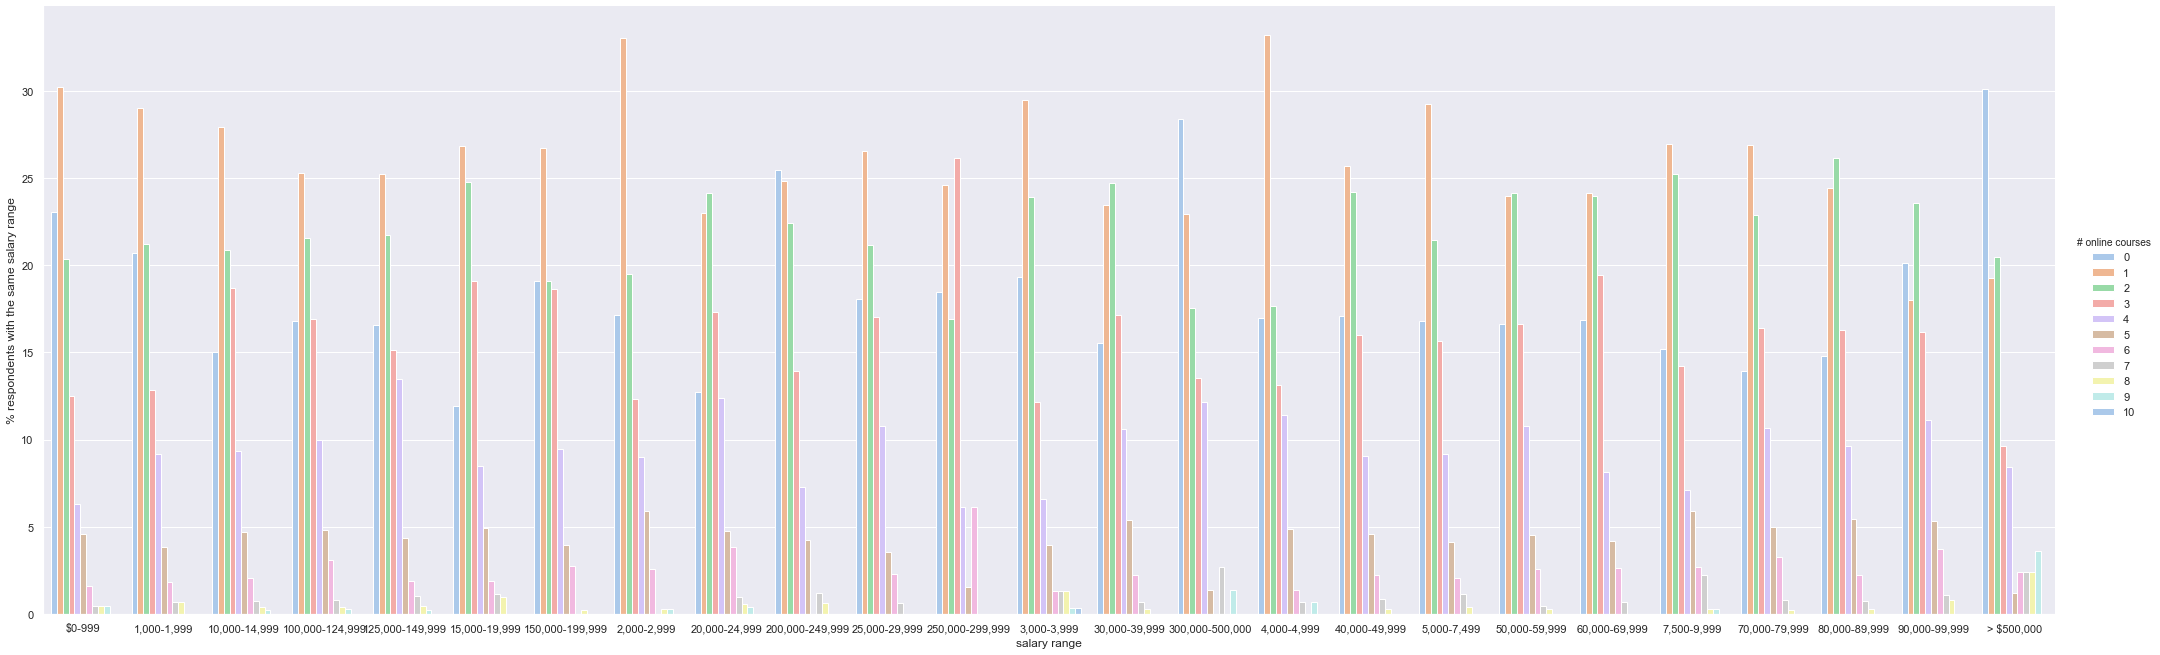

In [200]:
# # Plot results
sns.set(font_scale=1) 
formalEd_compSize_gender_age_role_courses_gbSalaryCourses.rename(columns={'Q4':'% respondents with the same salary range' , 'Q10':'salary range', 'all_courses': '# online courses'},inplace = True)
facet = sns.catplot(x="salary range", y="% respondents with the same salary range", hue="# online courses", data=formalEd_compSize_gender_age_role_courses_gbSalaryCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
            palette="pastel")
facet.ax.set_yticks(np.arange(0, 35,5))
plt.show()

In [192]:
# uncomment below for comparison considering  age and  online courses 
# formalEd_compSize_gender_age_role_courses_gbAgeCourses = formalEd_compSize_gender_age_role_courses.groupby(['Q1','all_courses']).count().reset_index()
# formalEd_compSize_gender_age_role_courses_gbAgeCourses['Q6'] = formalEd_compSize_gender_age_role_courses_gbAgeCourses[['Q1', 'Q6']].groupby('Q1').transform(lambda x: x*100/x.sum())['Q6']
# # formalEd_compSize_gender_age_role_courses_gbDegreeCourses.groupby('Q4').sum()
# formalEd_compSize_gender_age_role_courses_gbAgeCourses
# # Plot results
# sns.set(font_scale=1.5) 
# formalEd_compSize_gender_age_role_courses_gbAgeCourses.rename(columns={'Q4':'degree','Q6':'% respondents with the same age range' , 'Q1':'age', 'all_courses': '#online courses'},inplace = True)
# facet = sns.catplot(x="age", y="% respondents with the same age range", hue="#online courses", data=formalEd_compSize_gender_age_role_courses_gbAgeCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
#             palette="pastel")
# facet.ax.set_yticks(np.arange(0, 50,5))
# plt.show()

In [193]:
# uncomment below for comparison considering male/female and online courses

# formalEd_compSize_gender_age_role_courses_gbGenderCourses = formalEd_compSize_gender_age_role_courses.groupby(['Q2','all_courses']).count().reset_index()
# formalEd_compSize_gender_age_role_courses_gbGenderCourses['Q4'] = formalEd_compSize_gender_age_role_courses_gbGenderCourses[['Q2', 'Q4']].groupby('Q2').transform(lambda x: x*100/x.sum())['Q4']
# # formalEd_compSize_gender_age_role_courses_gbGenderCourses.groupby('Q2').sum()
# formalEd_compSize_gender_age_role_courses_gbGenderCourses

# # Plot results
# sns.set(font_scale=1.5) 
# formalEd_compSize_gender_age_role_courses_gbGenderCourses.rename(columns={'Q4':'% respondents with the same gender' , 'Q2':'gender', 'all_courses': '#online courses'},inplace = True)
# facet = sns.catplot(x="gender", y="% respondents with the same gender", hue="#online courses", data=formalEd_compSize_gender_age_role_courses_gbGenderCourses, height=9.27, aspect=22.7/7.27, kind="bar",  
#             palette="pastel")
# facet.ax.set_yticks(np.arange(0, 50,5))
# plt.show()